In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from rdkit import Chem
from rdkit.Chem import Descriptors
# pd.set_option('display.max_rows', None)

In [2]:
# h298_df = pd.read_csv('tests/data/gdb11_0.001.csv')
h298_df = pd.read_csv('tests/data/gdb11_0.01.csv')
h298_df.describe()

,h298
count,71161.000000
mean,-1.357522
std,59.770424
min,-343.774000
25%,-40.303000
50%,0.903000
75%,40.292000
max,253.086000


In [3]:
# calculate statistics for molecular weight of smiles in h298_df using Descriptors.ExactMolWt()
h298_df['MW'] = h298_df['smiles'].apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x)))
h298_df['MW'].describe()

count    71161.000000
mean       150.845469
std          7.529037
min         72.021129
25%        149.120449
50%        153.078979
75%        155.131014
max        174.050379
Name: MW, dtype: float64

In [4]:
# specify the root directory
root_dir = 'results'

dfs = []

# iterate over the directories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        
        # specify important files in the subdirectory
        json_path = os.path.join(subdir_path, "args.json")
        csv_path = os.path.join(subdir_path, "test_metrics.csv")
        
        # read in args.json
        with open(json_path, 'r') as f:
            json_data = json.load(f)
        json_df = pd.DataFrame({k:[v] for k, v in json_data.items()})
        
        # read in test_metrics.csv
        try:
            csv_df = pd.read_csv(csv_path)
        except FileNotFoundError:  # if job didn't finish, there'll be no CSV
            continue
        
        # concatentate horizontally
        df = pd.DataFrame({"directory": [subdir]})
        df = pd.concat([df, json_df, csv_df], axis=1)
        dfs.append(df)
                    
# combine the data into a single DataFrame
df = pd.concat(dfs, ignore_index=True)
df.drop(columns=['hf_col_name', 'lf_col_name', 'save_test_plot', 
                 'num_epochs', 'export_train_and_val', 'scale_data',
                 'results_dir'], inplace=True)

# df = df[df['split_type'] == 'random']
# df = df[df['split_type'] == 'scaffold']
df = df[df['split_type'] == 'h298']
# df = df[df['split_type'] == 'molwt']
# df = df[df['split_type'] == 'atom']

df['data_file'] = df['data_file'].apply(lambda x: float(x.split('/')[-1].split('_')[-1][:-4]))

df = df[df['data_file'] == 0.001]

df.sort_values(by=['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf', 'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio'])

,directory,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,split_type,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
462,2023-11-05_02-34-02.432801,delta_ml,0.001,0,0.0,0.0,0.0,h298,1,False,1,70.972164,74.338741,-2.548439,NaN,NaN,NaN
869,2023-11-05_02-31-00.193286,delta_ml,0.001,0,0.0,0.0,0.0,h298,1,False,1,102.355912,102.953035,-5.805895,NaN,NaN,NaN
3916,2023-11-05_02-22-24.662124,delta_ml,0.001,0,0.0,0.0,0.0,h298,1,False,1,50.802399,57.063995,-1.090891,NaN,NaN,NaN
4043,2023-11-05_02-25-50.417876,delta_ml,0.001,0,0.0,0.0,0.0,h298,1,False,1,69.294867,91.146967,-4.334472,NaN,NaN,NaN
5171,2023-11-05_02-19-17.241474,delta_ml,0.001,0,0.0,0.0,0.0,h298,1,True,1,60.745597,66.444904,-1.834852,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2023-11-05_06-04-37.576571,transfer,0.001,3,0.0,0.0,0.0,h298,100,True,1,20.479530,26.657998,-0.402629,166369.518046,212015.554632,-0.276067
2319,2023-11-05_06-22-09.218155,transfer,0.001,3,0.0,0.0,0.0,h298,100,False,1,21.151337,27.489441,-0.491488,171112.791702,212473.307307,-0.270305
2812,2023-11-05_04-50-52.250367,transfer,0.001,3,0.0,0.0,0.0,h298,100,True,2,42.414588,60.359950,-0.751108,134232.218748,162730.626743,-0.412093
4642,2023-11-05_05-07-44.500588,transfer,0.001,3,0.0,0.0,0.0,h298,100,False,2,39.910873,56.922408,-0.557334,127815.081261,159504.807114,-0.371703


In [5]:
df.loc[(df['model_type'] == 'multi_fidelity') & (df['add_pn_bias_to_make_lf'] == 0) & (df['add_constant_bias_to_make_lf'] == 0) & (df['add_gauss_noise_to_make_lf'] == 0) & \
       (df['add_descriptor_bias_to_make_lf'] == 0) & (df['lf_hf_size_ratio'] == 100) \
       & (df['lf_superset_of_hf'] == True) & (df['seed'] == 0)]

,directory,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,split_type,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
989,2023-11-05_09-36-01.750595,multi_fidelity,0.001,0,0.0,0.0,0.0,h298,100,True,0,68.082673,72.782790,-2.401452,64.230333,70.116069,-2.156764
1988,2023-11-05_09-26-58.504180,multi_fidelity,0.001,0,0.0,0.0,0.0,h298,100,True,0,75.022414,78.492509,-2.956065,68.018618,73.456497,-2.464714
3027,2023-11-05_09-39-44.219382,multi_fidelity,0.001,0,0.0,0.0,0.0,h298,100,True,0,68.193434,72.697792,-2.393512,64.106496,70.049495,-2.150772
5088,2023-11-05_09-31-05.179345,multi_fidelity,0.001,0,0.0,0.0,0.0,h298,100,True,0,69.391202,73.829889,-2.500027,64.966406,70.942955,-2.231659


In [6]:
# df[df.duplicated(['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
#             'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf','seed'])]

In [7]:
# df.loc[(df['model_type'] == 'multi_fidelity') & (df['add_pn_bias_to_make_lf'] == 0) & (df['add_constant_bias_to_make_lf'] == 0) & (df['add_gauss_noise_to_make_lf'] == 0) & (df['add_descriptor_bias_to_make_lf'] == 0) & (df['lf_hf_size_ratio'] == 1) \
#        & (df['lf_superset_of_hf'] == True) & (df['seed'] == 0)]

In [8]:
df_mean = df.drop(columns=['directory']).groupby(['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).mean().reset_index()
df_std = df.drop(columns=['directory']).groupby(['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).std().reset_index()

In [9]:
df_mean.model_type.value_counts()

model_type
multi_fidelity     60
transfer           60
delta_ml           55
multi_target       37
trad_delta_ml      33
single_fidelity     1
Name: count, dtype: int64

In [10]:
df_mean

,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
0,delta_ml,0.001,0,0.0,0.0,0.0,1,False,h298,1.0,73.356336,81.375684,-3.444924,NaN,NaN,NaN
1,delta_ml,0.001,0,0.0,0.0,0.0,1,True,h298,1.0,60.745597,66.444904,-1.834852,NaN,NaN,NaN
2,delta_ml,0.001,0,0.0,0.0,0.0,10,False,h298,0.8,66.357741,70.647349,-2.219841,NaN,NaN,NaN
3,delta_ml,0.001,0,0.0,0.0,0.0,10,True,h298,1.0,63.614345,68.718531,-2.060728,NaN,NaN,NaN
4,delta_ml,0.001,0,0.0,0.0,0.0,100,False,h298,1.0,79.477697,83.078501,-3.658707,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,transfer,0.001,3,0.0,0.0,0.0,1,True,h298,1.0,37.707672,49.547504,-0.583261,135832.127911,167138.974452,-0.362765
242,transfer,0.001,3,0.0,0.0,0.0,10,False,h298,1.0,35.061936,46.299351,-0.428972,132041.407062,165987.865846,-0.328675
243,transfer,0.001,3,0.0,0.0,0.0,10,True,h298,1.0,34.997835,45.958939,-0.415772,133837.664978,166920.629479,-0.354487
244,transfer,0.001,3,0.0,0.0,0.0,100,False,h298,1.0,33.906051,43.280036,-0.449870,133042.590836,165089.448960,-0.327410


In [11]:
df[df.model_type == 'multi_fidelity']

,directory,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,split_type,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
4,2023-11-05_09-14-34.128109,multi_fidelity,0.001,0,0.0,0.0,10.0,h298,1,False,1,91.411278,93.359063,-4.596544,74.911406,81.284609,-2.426539
53,2023-11-05_09-15-04.355012,multi_fidelity,0.001,0,0.0,0.0,0.0,h298,100,True,2,67.452325,71.498278,-2.282450,58.477313,64.074558,-1.636199
90,2023-11-05_06-52-29.855332,multi_fidelity,0.001,1,0.0,0.0,0.0,h298,1,False,0,66.220020,71.240850,-2.258856,69.453099,75.370714,-2.027629
99,2023-11-05_09-48-51.699753,multi_fidelity,0.001,1,0.0,0.0,0.0,h298,100,False,0,69.159664,73.520081,-2.470715,72.247687,78.619443,-2.294256
105,2023-11-05_09-10-50.146432,multi_fidelity,0.001,0,0.0,10.0,0.0,h298,1,True,1,64.369991,69.493615,-2.100964,65.598088,71.567468,-2.061295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,2023-11-05_09-38-46.486959,multi_fidelity,0.001,2,0.0,0.0,0.0,h298,10,True,1,43.546837,60.166470,-1.324428,1845.022287,1924.979055,-2.036287
5441,2023-11-05_09-41-14.429950,multi_fidelity,0.001,2,0.0,0.0,0.0,h298,100,False,2,41.284132,57.470587,-1.120793,1092.215890,1187.050071,-1.130920
5455,2023-11-05_08-02-31.462159,multi_fidelity,0.001,0,0.0,0.0,10.0,h298,1,True,2,68.951945,72.708806,-2.394540,74.717757,82.736988,-2.206326
5460,2023-11-05_08-52-59.687936,multi_fidelity,0.001,0,0.0,10.0,0.0,h298,10,True,2,64.120890,68.795869,-2.039007,57.982151,64.448320,-1.561192


In [12]:
df_mean[df_mean.model_type == 'single_fidelity']

,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
152,single_fidelity,0.001,0,0.0,0.0,0.0,1,True,h298,1.0,81.299176,83.705732,-3.507823,NaN,NaN,NaN


In [13]:
df_std[df_std.model_type == 'single_fidelity']

,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
152,single_fidelity,0.001,0,0.0,0.0,0.0,1,True,h298,0.845154,4.409022,3.833976,0.413752,NaN,NaN,NaN


In [17]:
# models_colors_dict = {
#     'single_fidelity': 'k',
#     'multi_target': 'b',
#     'multi_fidelity': 'r',
#     'multi_fidelity_weight_sharing': 'g',
# }

# model_type_dict = {
#     'single_fidelity': 'Single Fidelity',
#     'multi_target': 'Multi-Target',
#     'multi_fidelity': 'Multi-Fidelity',
#     'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
# }

# for lf_hf_size_ratio in [1]:  # , 10, 100]:
#     for lf_superset_of_hf in [True]:  # , False]:
#         default_var_values = {
#             'add_pn_bias_to_make_lf': 0, 
#             'add_constant_bias_to_make_lf': 0.0, 
#             'add_gauss_noise_to_make_lf': 0.0,	
#             'add_descriptor_bias_to_make_lf': 0.0, 
#             'lf_hf_size_ratio': lf_hf_size_ratio,
#             'lf_superset_of_hf': lf_superset_of_hf,
#         }

#         for current_var in default_var_values.keys():
#             not_current_var_default_values = {k:v for k,v in default_var_values.items() if k != current_var}

#             df_mean_ = df_mean.loc[(df_mean[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]
#             df_std_ = df_std.loc[(df_std[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]

#             # TODO: add lower bound baseline for single fidelity with 10% of the data at HF
#             # this single fidelity isn't a great baseline because it assumes having 100% of the data at HF (this is a best case-scenario, also need lower bound)
#             # plt.hlines(df_.loc[df_.model_type == 'single_fidelity'].MAE_hf, min(df_[current_var]), max(df_[current_var]), 'k', label='single_fidelity')

#             for model_type in [
#                 'single_fidelity',
#                 # 'multi_target', 
#                 'multi_fidelity', 
#                 'multi_fidelity_weight_sharing',
#             ]:
#                 df_mean__ = df_mean_.loc[df_mean_.model_type == model_type].sort_values(by=current_var)
#                 df_std__ = df_std_.loc[df_std_.model_type == model_type].sort_values(by=current_var)
#                 plt.plot(df_mean__[current_var], df_mean__.MAE_hf, 'o-'+models_colors_dict[model_type], label=model_type_dict[model_type]+' HF')
#                 plt.fill_between(df_mean__[current_var], df_mean__.MAE_hf - df_std__.MAE_hf, df_mean__.MAE_hf + df_std__.MAE_hf, alpha=0.2, color=models_colors_dict[model_type])
#                 if model_type != 'single_fidelity':
#                     plt.plot(df_mean__[current_var], df_mean__.MAE_lf, 'o--'+models_colors_dict[model_type], label=model_type_dict[model_type]+' LF')
#                     plt.fill_between(df_mean__[current_var], df_mean__.MAE_lf - df_std__.MAE_lf, df_mean__.MAE_lf + df_std__.MAE_lf, alpha=0.2, color=models_colors_dict[model_type])

#             if current_var == 'lf_hf_size_ratio':
#                 plt.xscale('log')

#             if current_var == 'add_pn_bias_to_make_lf':
#                 plt.yscale('log')
            
#             plt.legend()
#             plt.xlabel(current_var)
#             plt.ylabel('MAE [kcal/mol]')

#             if current_var == 'lf_hf_size_ratio':
#                 plt.title(f"lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
#             elif current_var == 'lf_superset_of_hf':
#                 plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}")
#             else:
#                 plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}, lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
#             # plt.legend(fontsize=14)
#             # plt.xlabel('LF:HF Dataset Size Ratio', fontsize=16)
#             # plt.ylabel('MAE [kcal/mol]', fontsize=16)
#             # plt.xticks(fontsize=14)
#             # plt.yticks(fontsize=14)
#             plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.png")
#             plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.pdf")
#             plt.show()

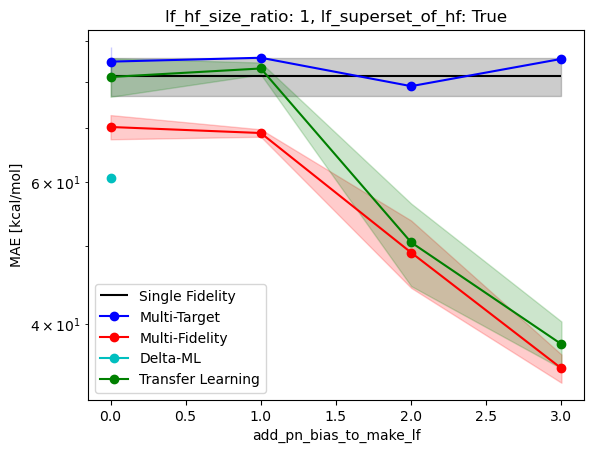

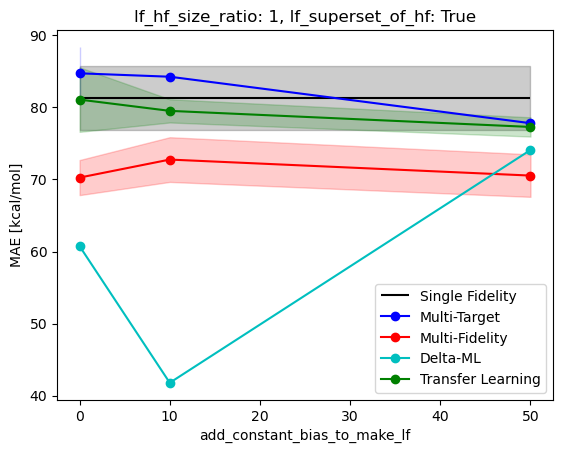

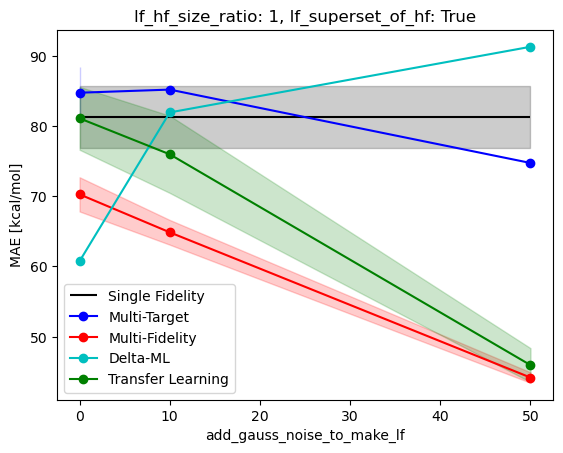

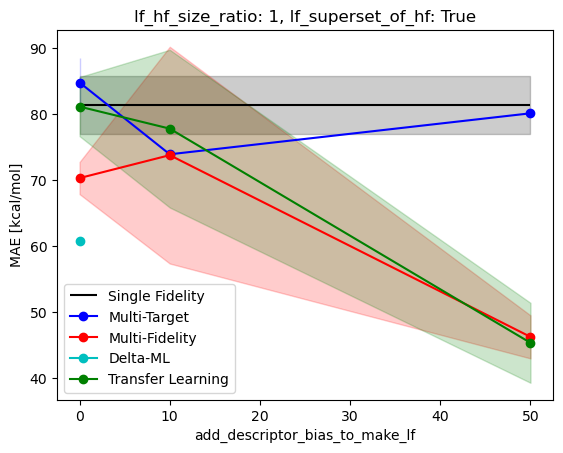

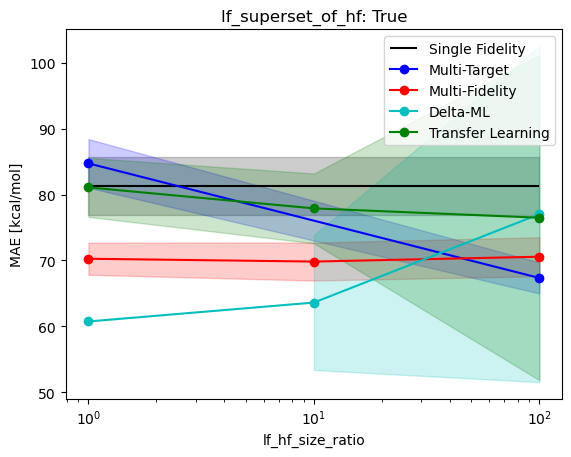

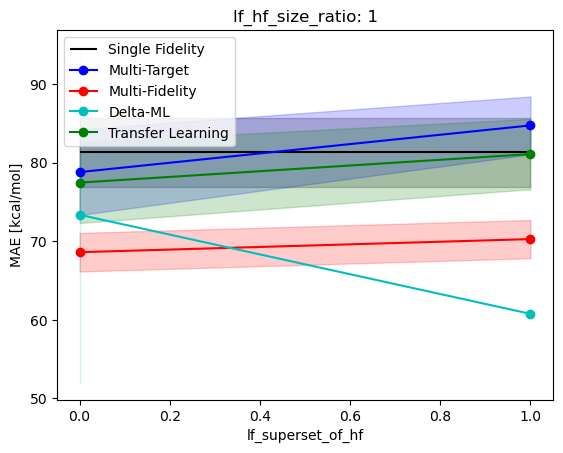

In [15]:
models_colors_dict = {
    'single_fidelity': 'k',
    'multi_target': 'b',
    'multi_fidelity': 'r',
    'delta_ml': 'c',
    'trad_delta_ml': 'm',
    'transfer': 'g',
    'multi_fidelity_weight_sharing': '',
}

model_type_dict = {
    'single_fidelity': 'Single Fidelity',
    'multi_target': 'Multi-Target',
    'multi_fidelity': 'Multi-Fidelity',
    'delta_ml': 'Delta-ML',
    'trad_delta_ml': 'Traditional Delta-ML',
    'transfer': 'Transfer Learning',
    'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
}

for lf_hf_size_ratio in [1]: #, 10, 100]:
    for lf_superset_of_hf in [True]:  #, False]:
        default_var_values = {
            'add_pn_bias_to_make_lf': 0, 
            'add_constant_bias_to_make_lf': 0.0, 
            'add_gauss_noise_to_make_lf': 0.0,	
            'add_descriptor_bias_to_make_lf': 0.0, 
            'lf_hf_size_ratio': lf_hf_size_ratio,
            'lf_superset_of_hf': lf_superset_of_hf,
        }

        for current_var in default_var_values.keys():
            not_current_var_default_values = {k:v for k,v in default_var_values.items() if k != current_var}

            df_mean_ = df_mean.loc[(df_mean[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]
            df_std_ = df_std.loc[(df_std[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]

            # TODO: add lower bound baseline for single fidelity with 10% of the data at HF
            # this single fidelity isn't a great baseline because it assumes having 100% of the data at HF (this is a best case-scenario, also need lower bound)
            # plt.hlines(df_.loc[df_.model_type == 'single_fidelity'].MAE_hf, min(df_[current_var]), max(df_[current_var]), 'k', label='single_fidelity')

            for model_type in [
                'single_fidelity',
                'multi_target', 
                'multi_fidelity', 
                'delta_ml',
                # 'trad_delta_ml',
                'transfer',
                # 'multi_fidelity_weight_sharing',
            ]:
                df_mean__ = df_mean_.loc[df_mean_.model_type == model_type].sort_values(by=current_var)
                df_std__ = df_std_.loc[df_std_.model_type == model_type].sort_values(by=current_var)
                if model_type == 'single_fidelity':
                    plt.hlines(df_mean__.MAE_hf, 
                               min(df_mean_[current_var]), 
                               max(df_mean_[current_var]), 
                               models_colors_dict[model_type], 
                               label=model_type_dict[model_type])
                    plt.fill_between([min(df_mean_[current_var]), max(df_mean_[current_var])],
                                     df_mean__.MAE_hf - df_std__.MAE_hf, 
                                     df_mean__.MAE_hf + df_std__.MAE_hf, 
                                     alpha=0.2, 
                                     color=models_colors_dict[model_type])
                else:
                    plt.plot(df_mean__[current_var], df_mean__.MAE_hf, 'o-'+models_colors_dict[model_type], label=model_type_dict[model_type]) #+' HF')
                    plt.fill_between(df_mean__[current_var], df_mean__.MAE_hf - df_std__.MAE_hf, df_mean__.MAE_hf + df_std__.MAE_hf, alpha=0.2, color=models_colors_dict[model_type])
                    # plt.plot(df_mean__[current_var], df_mean__.MAE_lf, 'o--'+models_colors_dict[model_type], label=model_type_dict[model_type]+' LF')
                    # plt.fill_between(df_mean__[current_var], df_mean__.MAE_lf - df_std__.MAE_lf, df_mean__.MAE_lf + df_std__.MAE_lf, alpha=0.2, color=models_colors_dict[model_type])

            if current_var == 'lf_hf_size_ratio':
                plt.xscale('log')

            if current_var == 'add_pn_bias_to_make_lf':
                plt.yscale('log')
            
            plt.legend()
            plt.xlabel(current_var)
            plt.ylabel('MAE [kcal/mol]')

            if current_var == 'lf_hf_size_ratio':
                plt.title(f"lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            elif current_var == 'lf_superset_of_hf':
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}")
            else:
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}, lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            # plt.legend(fontsize=14)
            # plt.xlabel('LF:HF Dataset Size Ratio', fontsize=16)
            # plt.ylabel('MAE [kcal/mol]', fontsize=16)
            # plt.xticks(fontsize=14)
            # plt.yticks(fontsize=14)
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.png")
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.pdf")
            plt.show()